<a href="https://colab.research.google.com/github/gtmray/pneumonia/blob/master/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import random

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num of GPUs: ", len(physical_devices))
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

pd.set_option('display.max_columns', 10)
sns.set()
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Num of GPUs:  1


In [ ]:
if os.path.isdir('chest_xray') is False:
    ! pip install -q kaggle
    from google.colab import files
    files.upload()
    ! mkdir ~/.kaggle 
    ! cp kaggle.json ~/.kaggle/
    ! chmod 600 ~/.kaggle/kaggle.json
    ! kaggle datasets list
    ! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
    !unzip chest-xray-pneumonia.zip
    shutil.rmtree('/content/chest_xray/chest_xray')
    shutil.rmtree('/content/chest_xray/__MACOSX')

In [6]:
train_path = '/content/chest_xray/train'
valid_path = '/content/chest_xray/val'
test_path = '/content/chest_xray/test'

train_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224, 224), classes=['NORMAL', 'PNEUMONIA'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['NORMAL', 'PNEUMONIA'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224), classes=['NORMAL', 'PNEUMONIA'], batch_size=10, shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
def plot_confusion_matrix(batch_to_pred):
  preds = model.predict(x=batch_to_pred)
  y_preds = np.argmax(preds, axis=-1)
  y_true = batch_to_pred.classes
  confuse = confusion_matrix(y_true, y_preds)    
  sns.heatmap(pd.DataFrame(confuse), annot=True, cmap='viridis', fmt='g')
  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('Actual label')
  plt.title('CONFUSION MATRIX')
  plt.show()


Epoch 1/10
522/522 - 85s - loss: 0.2356 - accuracy: 0.9041 - val_loss: 0.5546 - val_accuracy: 0.6875
Epoch 2/10
522/522 - 84s - loss: 0.1290 - accuracy: 0.9505 - val_loss: 0.3860 - val_accuracy: 0.8125
Epoch 3/10
522/522 - 83s - loss: 0.1056 - accuracy: 0.9599 - val_loss: 0.2929 - val_accuracy: 0.8750
Epoch 4/10
522/522 - 82s - loss: 0.0905 - accuracy: 0.9641 - val_loss: 0.2752 - val_accuracy: 0.8750
Epoch 5/10
522/522 - 82s - loss: 0.0793 - accuracy: 0.9695 - val_loss: 0.2475 - val_accuracy: 0.8125
Epoch 6/10
522/522 - 82s - loss: 0.0734 - accuracy: 0.9722 - val_loss: 0.2608 - val_accuracy: 0.8125
Epoch 7/10
522/522 - 81s - loss: 0.0666 - accuracy: 0.9743 - val_loss: 0.2129 - val_accuracy: 0.8125
Epoch 8/10
522/522 - 81s - loss: 0.0611 - accuracy: 0.9789 - val_loss: 0.2048 - val_accuracy: 0.8125
Epoch 9/10
522/522 - 81s - loss: 0.0575 - accuracy: 0.9791 - val_loss: 0.3863 - val_accuracy: 0.8125
Epoch 10/10
522/522 - 80s - loss: 0.0534 - accuracy: 0.9826 - val_loss: 0.1939 - val_accura

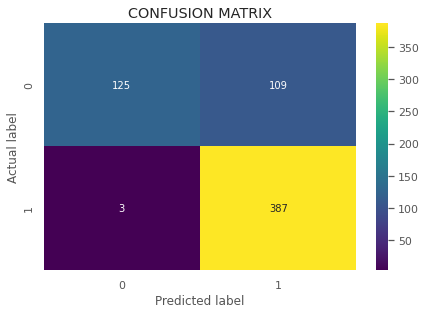

In [8]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
#vgg16_model.summary()

model = Sequential()
for layer in vgg16_model.layers[:-1]: #Except last layer
  model.add(layer)

for layer in model.layers: #Avoiding training layers
  layer.trainable=False

model.add(Dense(units=2, activation='softmax')) #Adding custom last layer
#model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

plot_confusion_matrix(test_batches)
